In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

from text_process import text_preprocess, remove_stop_words, lemmatize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, NMF, LatentDirichletAllocation

In [2]:
articles1 = pd.read_csv('./all_the_news/articles1.csv', index_col=0)
articles2 = pd.read_csv('./all_the_news/articles2.csv', index_col=0)
articles3 = pd.read_csv('./all_the_news/articles3.csv', index_col=0)

# Articles1

In [3]:
articles1.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
articles1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 53291
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [5]:
articles1.publication.value_counts()

Breitbart           23781
CNN                 11488
New York Times       7803
Business Insider     6757
Atlantic              171
Name: publication, dtype: int64

In [6]:
articles1.year.value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

# Articles2

In [7]:
articles2.head()

,id,title,publication,author,date,year,month,url,content
53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [8]:
articles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 53293 to 103457
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49999 non-null  int64  
 1   title        49998 non-null  object 
 2   publication  49999 non-null  object 
 3   author       41401 non-null  object 
 4   date         47373 non-null  object 
 5   year         47373 non-null  float64
 6   month        47373 non-null  float64
 7   url          42988 non-null  object 
 8   content      49999 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ MB


In [9]:
articles2.publication.value_counts()

New York Post          17493
Atlantic                7008
National Review         6203
Talking Points Memo     5214
Guardian                4873
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [10]:
articles2.year.value_counts()

2016.0    28932
2017.0    18273
2015.0      147
2014.0        7
2013.0        3
2011.0        2
2004.0        2
2012.0        1
2010.0        1
2009.0        1
2008.0        1
2007.0        1
2005.0        1
2003.0        1
Name: year, dtype: int64

In [11]:
articles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 53293 to 103457
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49999 non-null  int64  
 1   title        49998 non-null  object 
 2   publication  49999 non-null  object 
 3   author       41401 non-null  object 
 4   date         47373 non-null  object 
 5   year         47373 non-null  float64
 6   month        47373 non-null  float64
 7   url          42988 non-null  object 
 8   content      49999 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ MB


## Take only articles published during 2011 and after

In [12]:
articles2 = articles2[articles2.year >=2011]
articles2.publication.value_counts()

New York Post          17493
Atlantic                7008
National Review         6202
Buzzfeed News           4854
Guardian                4846
Fox News                4351
Talking Points Memo     2611
Name: publication, dtype: int64

In [13]:
articles2.year.value_counts()

2016.0    28932
2017.0    18273
2015.0      147
2014.0        7
2013.0        3
2011.0        2
2012.0        1
Name: year, dtype: int64

# Articles3

In [14]:
articles3.head()

,id,title,publication,author,date,year,month,url,content
103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [15]:
articles3 = articles3[articles3.year >=2011]
articles3.publication.value_counts()

NPR                11981
Washington Post    11114
Reuters            10710
Vox                 4947
Guardian            3792
Name: publication, dtype: int64

In [16]:
articles3.year.value_counts()

2016.0    28022
2017.0    14223
2015.0      232
2014.0       42
2013.0       13
2012.0        7
2011.0        5
Name: year, dtype: int64

In [17]:
articles3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42544 entries, 103459 to 146032
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           42544 non-null  int64  
 1   title        42543 non-null  object 
 2   publication  42544 non-null  object 
 3   author       41584 non-null  object 
 4   date         42544 non-null  object 
 5   year         42544 non-null  float64
 6   month        42544 non-null  float64
 7   url          42544 non-null  object 
 8   content      42544 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.2+ MB


# All Articles

In [18]:
df = pd.concat([articles1, articles2, articles3])
df.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139909 entries, 0 to 146032
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           139909 non-null  int64  
 1   title        139907 non-null  object 
 2   publication  139909 non-null  object 
 3   author       124999 non-null  object 
 4   date         139909 non-null  object 
 5   year         139909 non-null  float64
 6   month        139909 non-null  float64
 7   url          82900 non-null   object 
 8   content      139909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.7+ MB


In [20]:
df.publication.value_counts()

Breitbart              23781
New York Post          17493
NPR                    11981
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8638
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6202
Vox                     4947
Buzzfeed News           4854
Fox News                4351
Talking Points Memo     2611
Name: publication, dtype: int64

In [21]:
df.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [22]:
a = pd.DataFrame(df.groupby(["date"]).size().rename('Count'))
a.sort_values(by='Count', ascending=False)

,Count
date,
2017-02-03,402
2017-04-13,400
2016-08-22,389
2017-04-14,387
2017-04-07,386
...,...
2014-10-26,1
2014-11-03,1
2014-11-08,1


In [23]:
b = pd.DataFrame(df.groupby(["year"]).size().rename('Count'))
b.sort_values(by='Count', ascending=False)

,Count
year,
2016.0,85405
2017.0,50404
2015.0,3705
2013.0,228
2014.0,125
2012.0,34
2011.0,8


In [24]:
df2 = df[df.year >= 2015]
df2.year.value_counts()

2016.0    85405
2017.0    50404
2015.0     3705
Name: year, dtype: int64

In [25]:
df2.date.value_counts()

2017-02-03    402
2017-04-13    400
2016-08-22    389
2017-04-14    387
2017-04-07    386
             ... 
2015/9/21       1
2015-12-10      1
2015-03-01      1
2015/1/13       1
2015-08-13      1
Name: date, Length: 1349, dtype: int64

In [28]:
def getInputDataAndDisplayStats(df, printSummary=False):

    #only take in articles of len > 200
    df=df[df['content'].str.len()>=200]

    #find and remove summary NYT "briefing" articles to avoid confusing the clustering
    targetString="(Want to get this briefing by email?"
    df['NYT summary']=df['content'].map(lambda d: d[:len(targetString)]==targetString)
    df=df[df['NYT summary']==False]

    #removes a warning that appears in many of the Atlantic articles.
    targetString="For us to continue writing great stories, we need to display ads.             Please select the extension that is blocking ads.     Please follow the steps below"
    df['content']=df['content'].str.replace(targetString,'')

    #also for some Atlantic articles
    targetString="This article is part of a feature we also send out via email as The Atlantic Daily, a newsletter with stories, ideas, and images from The Atlantic, written specially for subscribers. To sign up, please enter your email address in the field provided here."
    df=df[df['content'].str.contains(targetString)==False]

    #also for some Atlantic articles
    targetString="This article is part of a feature we also send out via email as Politics  Policy Daily, a daily roundup of events and ideas in American politics written specially for newsletter subscribers. To sign up, please enter your email address in the field provided here."
    df=df[df['content'].str.contains(targetString)==False]

    # More Atlantic-specific removals (for daily summaries with multiple stories contained)
    df=df[df['content'].str.contains("To sign up, please enter your email address in the field")==False]

    # Remove daily CNN summary
    targetString="CNN Student News"
    df=df[df['content'].str.contains(targetString)==False]

    if printSummary:
        print("\nArticle counts by publisher:")
        print(df['publication'].value_counts())

        print("\nArticle counts by date:")
        print(df['date'].value_counts())

    # Remove non-ASCII characters
    df['content']=df['content'].map(lambda x: removeNonASCIICharacters(x))

    return df

def removeNonASCIICharacters(textString): 
    return "".join(i for i in textString if ord(i)<128)

In [29]:
df1 = getInputDataAndDisplayStats(df, printSummary=True)

<ipython-input-28-5de8f1ef2e4e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NYT summary']=df['content'].map(lambda d: d[:len(targetString)]==targetString)



Article counts by publisher:
Breitbart              23585
New York Post          17487
NPR                    11956
CNN                    11249
Washington Post        11076
Reuters                10710
Guardian                8626
New York Times          7620
Atlantic                6716
Business Insider        6523
National Review         6154
Vox                     4947
Buzzfeed News           4819
Fox News                4329
Talking Points Memo     2533
Name: publication, dtype: int64

Article counts by date:
2017-02-03    400
2017-04-13    398
2017-04-14    384
2017-04-07    382
2017-04-06    379
             ... 
2013-01-07      1
2011-10-11      1
2014-10-08      1
2012-07-17      1
2012-09-11      1
Name: date, Length: 1599, dtype: int64


In [30]:
df1

,id,title,publication,author,date,year,month,url,content,NYT summary
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON Congressional Republicans have ...,False
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",False
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disneys Bambi opened in 1942, critic...",False
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isnt ...",False
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea North Koreas leader, Ki...",False
...,...,...,...,...,...,...,...,...,...,...
146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...,False
146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...,False
146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...,False
146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...,False


In [31]:
#only look at days with over 50 articles
df1 = df1[df1.groupby('date').date.transform(len) > 50]

In [32]:
df1.date.value_counts().sort_index().index

Index(['2015-12-30', '2015-12-31', '2016-01-01', '2016-01-02', '2016-01-03',
       '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       ...
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26',
       '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-03'],
      dtype='object', length=550)

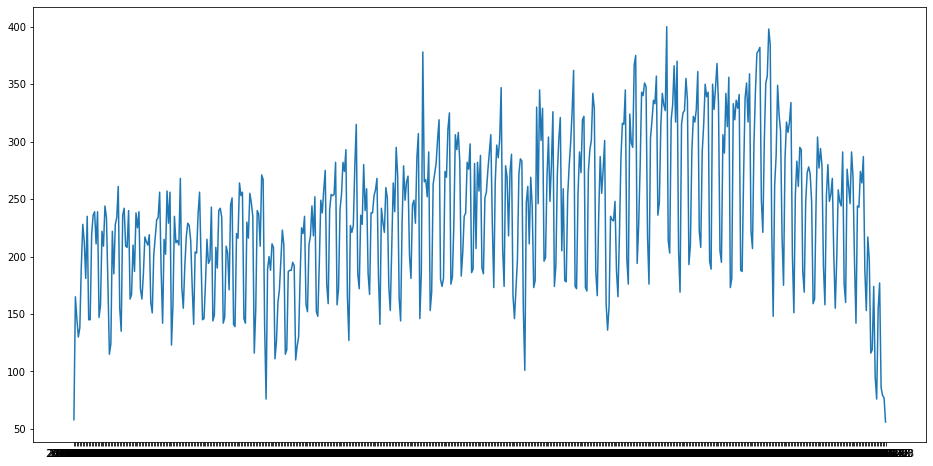

In [33]:
plt.figure(figsize=(16,8))
plt.plot(df1.date.value_counts().sort_index().index, 
         df1.date.value_counts().sort_index().values)

In [34]:
df1.date.value_counts()

2017-02-03    400
2017-04-13    398
2017-04-14    384
2017-04-07    382
2017-04-06    379
             ... 
2017-06-30     77
2017-06-25     76
2016-05-08     76
2015-12-30     58
2017-07-03     56
Name: date, Length: 550, dtype: int64

In [39]:
processed = df1['content'].apply(text_preprocess).apply(remove_stop_words)

In [41]:
text = processed.apply(lemmatize)

In [42]:
df1['content_processed'] = text

<ipython-input-42-dcb9289dc645>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content_processed'] = text


In [43]:
pd.to_pickle(df1, 'all_news_articles.pkl')

In [422]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129620 entries, 0 to 146032
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   129620 non-null  int64  
 1   title                129618 non-null  object 
 2   publication          129620 non-null  object 
 3   author               116618 non-null  object 
 4   date                 129620 non-null  object 
 5   year                 129620 non-null  float64
 6   month                129620 non-null  float64
 7   url                  77332 non-null   object 
 8   content              129620 non-null  object 
 9   NYT summary          129620 non-null  bool   
 10  content no nonascii  129620 non-null  object 
 11  content_processed    129620 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 12.0+ MB


# LSA

In [590]:
df1[df1.date=='2017-07-03'].publication.value_counts()

Reuters            35
Washington Post    21
Name: publication, dtype: int64

In [591]:
text = df1[df1.date=='2017-07-03']['content_processed']
text.shape

(56,)

In [592]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

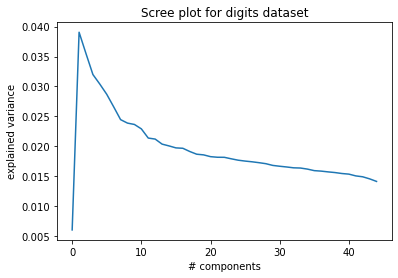

In [627]:
n_components = 45
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

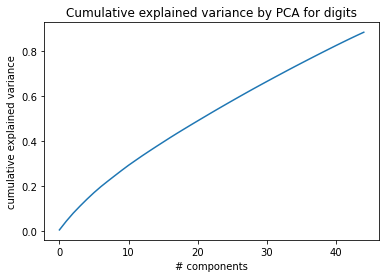

In [628]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [629]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

,abadi,abandoned,abc,abdelmadjid,abe,abes,ability,ablan,able,abraham,...,yuichiro,yup,yuriko,zagaris,zakaria,zandi,zeldin,zero,zone,zucker
topic_0,0.002,0.005,0.004,0.002,0.053,0.028,0.001,0.002,0.012,0.001,...,0.003,0.002,0.006,0.001,0.003,0.004,0.007,0.003,0.010,0.011
topic_1,-0.000,0.006,-0.008,0.002,0.033,0.016,-0.001,0.006,-0.007,-0.001,...,0.007,-0.001,0.004,-0.000,-0.001,0.001,-0.010,-0.000,0.006,-0.014
topic_2,0.001,-0.000,-0.008,0.000,0.009,0.004,-0.000,0.000,0.012,-0.000,...,-0.000,-0.000,0.001,-0.000,-0.000,-0.003,-0.010,0.001,0.004,-0.010
topic_3,0.002,-0.004,-0.001,0.003,0.237,0.125,-0.001,-0.002,0.009,-0.000,...,0.001,-0.001,0.028,-0.001,-0.001,0.000,-0.002,0.005,0.015,-0.005
topic_4,0.003,0.001,-0.005,0.002,0.209,0.111,0.000,-0.001,0.007,0.000,...,-0.005,0.001,0.025,0.001,-0.001,-0.004,-0.005,0.005,0.007,-0.005
topic_5,-0.002,-0.007,0.003,-0.001,0.030,0.015,-0.001,-0.001,0.001,-0.001,...,0.005,-0.001,0.003,-0.001,-0.001,0.002,0.005,-0.003,0.002,0.003
topic_6,0.003,0.004,-0.004,0.005,-0.046,-0.025,0.004,-0.002,0.012,0.005,...,-0.000,0.008,-0.005,0.006,0.008,-0.001,0.002,-0.000,-0.009,0.015
topic_7,0.007,-0.009,-0.008,0.007,-0.151,-0.081,0.001,-0.002,-0.008,0.001,...,0.002,0.000,-0.018,0.001,0.002,-0.002,-0.011,0.007,-0.001,-0.010
topic_8,0.005,0.014,0.002,0.003,-0.076,-0.042,-0.002,0.004,-0.008,-0.001,...,-0.002,-0.002,-0.009,-0.001,-0.002,-0.002,0.001,-0.002,-0.003,0.001
topic_9,0.007,-0.006,-0.001,0.009,-0.076,-0.043,0.000,-0.002,-0.006,-0.001,...,0.001,-0.003,-0.009,-0.001,-0.000,0.003,-0.002,0.009,0.014,-0.004


In [630]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, said, percent, state, would, president, new, year, election, company

Topic  1
percent, bank, rose, sale, index, crude, highest, company, construction, billion

Topic  2
christie, beach, park, governor, state, budget, shutdown, family, jersey, island

Topic  3
abe, ldp, tokyo, party, election, abes, minister, putin, seat, koikes

Topic  4
fox, horowitz, sport, abe, ldp, party, tokyo, abes, minister, allegation

Topic  5
fox, horowitz, sport, percent, crude, rose, bank, trump, output, construction

Topic  6
jefferson, wimbledon, kang, life, franklin, goddard, american, djokovic, agassi, break

Topic  7
putin, russia, russian, rule, state, meeting, syria, airport, ukraine, interference

Topic  8
danone, putin, fairfax, stonyfield, deal, glp, equity, domain, bid, westinghouse

Topic  9
bill, budget, airport, vote, senate, city, rule, airline, gop, mexico

Topic  10
bill, budget, putin, would, gop, jefferson, senate, medicaid, tax, russia

Topic  11
wimbledon, kang, djokov

In [631]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df1[df1.date=='2017-07-03']['title'],
             columns = index)

In [632]:
doc_topic.sort_values('topic_1')

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44
title,,,,,,,,,,,,,,,,,,,,,
The problem with ‘But Trump’s base loves it!’,0.41919,-0.33793,-0.27017,-0.08419,-0.16641,0.12454,-0.05926,-0.27451,0.03193,0.04423,...,-0.02544,0.02813,0.02890,-0.02552,0.02220,0.02369,-0.11290,0.06017,-0.07194,-0.02683
Why Trump wants a war on the media,0.36757,-0.33140,-0.31656,-0.03375,-0.17079,0.10939,-0.12118,-0.21525,0.04566,-0.01790,...,-0.03831,-0.03577,0.01649,0.05792,0.03577,0.08488,-0.01533,0.09090,-0.15066,0.00752
"If Trump doesn’t raise election interference with Putin, he’s inviting more in 2018",0.37460,-0.26449,-0.28228,0.14453,-0.04371,0.02751,-0.28088,0.39840,0.12177,-0.29963,...,0.06324,-0.04965,-0.02166,0.02453,0.04532,0.04650,-0.04419,0.05749,-0.03679,-0.00391
The Greek tragedy that is Chris Christie’s political career hits another new low,0.29019,-0.25337,0.64134,-0.03329,-0.05366,0.08026,0.05646,-0.01289,0.07445,-0.22906,...,0.01582,-0.04903,0.03481,0.00988,0.03517,0.05185,-0.05083,0.03162,-0.01621,-0.00694
"Chris Christie enjoyed a closed beach, then got flamed. But he definitely did not get a tan.",0.26808,-0.24958,0.67693,-0.05087,-0.08198,0.07895,0.02603,0.01296,0.07574,-0.22806,...,-0.01970,0.01631,0.06110,0.00308,0.03646,0.00100,-0.02784,0.02549,0.00480,-0.01316
"Trump praises veterans, hits media at Kennedy Center event",0.34289,-0.24638,-0.23016,0.00517,-0.13056,0.06906,-0.05298,-0.08512,0.01442,-0.03162,...,-0.11888,0.44517,0.25424,-0.19999,0.08169,-0.11267,0.19738,-0.24069,0.22860,-0.02090
CNN’s Jeffrey Lord outdoes himself in defending Trump’s CNN-beating tweet,0.33858,-0.24342,-0.22020,-0.04497,-0.08952,0.08160,0.02891,-0.16208,0.00798,-0.02283,...,-0.04386,-0.31349,-0.20308,0.05622,-0.20807,-0.11827,0.17368,-0.14413,0.33361,0.08259
Trump considering lawyer for White House Russia role: sources,0.31166,-0.19404,0.03002,-0.02717,-0.07710,-0.00960,-0.26732,0.07572,-0.04126,-0.04525,...,0.07729,0.10232,-0.07944,0.05501,-0.28708,0.25157,-0.21112,-0.01311,0.13600,0.16525
"Maine, New Jersey lawmakers scramble to end partial government shutdowns",0.36550,-0.18146,0.61667,-0.03514,-0.07187,0.01014,-0.17490,-0.00999,-0.00755,0.11284,...,-0.07129,0.04370,-0.02581,0.00940,-0.04647,-0.04799,0.05906,-0.05413,0.06377,-0.00044


In [634]:
doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic
title,,,,,,,,,,,,,,,,,,,,,
"Commentary: Seeking the truth, not the tragedy, in journalism",0.31315,-0.09596,-0.11316,-0.04850,0.00565,0.04508,0.14931,-0.11999,0.06234,-0.01667,...,-0.18647,-0.01373,0.29233,-0.04343,0.17802,0.00991,-0.10527,-0.10429,0.08287,topic_0
"Maine, New Jersey lawmakers scramble to end partial government shutdowns",0.36550,-0.18146,0.61667,-0.03514,-0.07187,0.01014,-0.17490,-0.00999,-0.00755,0.11284,...,0.04370,-0.02581,0.00940,-0.04647,-0.04799,0.05906,-0.05413,0.06377,-0.00044,topic_2
"Japan PM’s party suffers historic defeat in Tokyo poll, popular governor wins big",0.29871,0.06571,0.01341,0.56899,0.49127,0.05556,-0.10120,-0.29230,-0.16423,-0.17248,...,0.00999,-0.00080,-0.01677,-0.02056,0.01577,0.02329,0.00166,0.02064,-0.00853,topic_3
Japan PM seeks to regain public’s trust after Tokyo poll setback,0.33978,0.12116,0.03141,0.58084,0.47937,0.07041,-0.08891,-0.26919,-0.11904,-0.11093,...,-0.01473,0.00929,0.01132,-0.00650,0.00585,0.01198,-0.00904,0.00329,0.01117,topic_3
Australia’s Fairfax ends talks with PE suitors without formal bid,0.25092,0.28092,0.00099,-0.12477,0.00705,-0.16755,-0.08024,-0.22534,0.39176,-0.07897,...,0.01364,-0.00495,0.01276,0.01903,-0.29167,-0.16275,0.23073,0.25076,0.20214,topic_8
Japan firms most upbeat in three years but labor shortages weigh: BOJ tankan,0.26283,0.35492,-0.00414,0.03891,-0.18503,0.17842,-0.01613,0.05965,-0.06446,0.04010,...,0.06494,0.01473,0.16633,0.11961,0.09750,0.09586,-0.29705,0.04358,-0.05325,topic_1
"Global Logistic Properties receives bid proposals, buyout groups seen interested",0.24081,0.27292,-0.00474,-0.11417,0.04931,-0.21579,-0.09154,-0.17142,0.41309,-0.07397,...,0.09224,-0.04324,0.12312,-0.13670,-0.04003,-0.10283,-0.21704,-0.21510,-0.36929,topic_8
Washington tells India Westinghouse could be sold by year end: sources,0.22943,0.09683,-0.03632,0.00038,0.07229,-0.18492,-0.09200,-0.03016,0.23633,-0.06585,...,0.04258,0.02019,0.08301,-0.09267,-0.06156,-0.00235,0.01148,-0.06461,-0.00624,topic_24
Tower of human skulls in Mexico casts new light on Aztecs,0.13172,-0.01245,0.03107,-0.02266,0.05449,-0.05023,0.19819,0.07779,0.05959,0.11689,...,-0.08222,-0.12921,-0.11820,-0.02509,-0.04630,0.00143,-0.00650,0.02703,-0.01758,topic_15


In [651]:
doc_topic[doc_topic['topic'] == 'topic_0'].index.tolist()

['Commentary: Seeking the truth, not the tragedy, in journalism',
 'Three more states refuse Trump commission’s voter data request',
 'Facebook fights U.S. gag order that it says chills free speech',
 'The economy President Trump loves looks a lot like the one candidate Trump hated',
 'The problem with ‘But Trump’s base loves it!’',
 'Why Trump wants a war on the media',
 'If this scam works as planned, Republicans could still destroy Obamacare',
 'CNN’s Jeffrey Lord outdoes himself in defending Trump’s CNN-beating tweet']

In [652]:
doc_topic[doc_topic['topic'] == 'topic_1'].index.tolist()

['Japan firms most upbeat in three years but labor shortages weigh: BOJ tankan',
 'Global stocks, dollar, oil, treasury yields start quarter with gains',
 'Oil rises more than 2 percent as U.S. crude output slows',
 'U.S. factory activity jumps to near three-year high, construction spending flat']

In [650]:
doc_topic['topic'].value_counts()

topic_0     8
topic_1     4
topic_2     3
topic_13    3
topic_11    3
topic_4     2
topic_12    2
topic_7     2
topic_3     2
topic_16    2
topic_8     2
topic_14    2
topic_20    2
topic_10    1
topic_34    1
topic_36    1
topic_40    1
topic_19    1
topic_18    1
topic_27    1
topic_15    1
topic_44    1
topic_21    1
topic_35    1
topic_9     1
topic_17    1
topic_39    1
topic_29    1
topic_22    1
topic_32    1
topic_24    1
topic_33    1
Name: topic, dtype: int64

# NMF

In [653]:
df1[df1.date=='2017-07-03'].publication.value_counts()

Reuters            35
Washington Post    21
Name: publication, dtype: int64

In [654]:
text_nmf = df1[df1.date=='2017-07-03']['content_processed']
text.shape

(56,)

In [655]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text_nmf)

In [656]:
n_components = 45
nmf = NMF(n_components)
doc_topic = nmf.fit_transform(tfidf)

In [657]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

,abadi,abandoned,abc,abdelmadjid,abe,abes,ability,ablan,able,abraham,...,yuichiro,yup,yuriko,zagaris,zakaria,zandi,zeldin,zero,zone,zucker
topic_0,0.000,0.000,0.13,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.025,0.000,0.000,0.000,0.000
topic_1,0.000,0.001,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.010,0.000,0.000,0.000,0.000
topic_2,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.024,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic_3,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic_4,0.000,0.000,0.00,0.000,0.509,0.27,0.000,0.000,0.025,0.000,...,0.000,0.000,0.06,0.000,0.000,0.000,0.000,0.000,0.026,0.000
topic_5,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic_6,0.000,0.000,0.00,0.001,0.000,0.00,0.000,0.000,0.226,0.000,...,0.000,0.000,0.00,0.000,0.305,0.004,0.000,0.000,0.000,0.000
topic_7,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic_8,0.000,0.059,0.00,0.000,0.001,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic_9,0.000,0.000,0.00,0.000,0.001,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.001,0.000,0.124,0.000,0.000


In [659]:
display_topics(nmf, vectorizer.get_feature_names(), 10)


Topic  0
trump, medium, tweet, cnn, branding, crowd, white, base, twitter, house

Topic  1
construction, percent, spending, ism, rose, may, reading, index, economy, manufacturing

Topic  2
christie, beach, park, family, governor, island, sun, state, closed, shutdown

Topic  3
fox, horowitz, sport, departure, glaser, attorney, century, album, memo, adhere

Topic  4
abe, ldp, tokyo, party, abes, minister, election, ldps, koikes, seat

Topic  5
fox, sport, horowitz, network, espn, programming, personality, allegation, harassment, jamie

Topic  6
emancipate, american, empower, democrat, connect, medicaid, health, ask, well, america

Topic  7
putin, russia, russian, election, interference, meeting, meddling, ukraine, syria, want

Topic  8
fairfax, glp, domain, bid, bidder, equity, property, ltd, said, newspaper

Topic  9
opposition, maduro, vote, assembly, ortega, chavez, maduros, socialist, venezuelan, national

Topic  10
gop, bill, cut, tax, medicaid, would, senator, republican, trump, m

In [660]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df1[df1.date=='2017-07-03']['title'],
             columns = index)

In [663]:
doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic
title,,,,,,,,,,,,,,,,,,,,,
"Commentary: Seeking the truth, not the tragedy, in journalism",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,topic_30
"Maine, New Jersey lawmakers scramble to end partial government shutdowns",0.00000,0.00000,0.37676,0.00000,0.00000,0.00000,0.00301,0.00000,0.00000,0.00005,...,0.00000,0.00000,0.47286,0.00000,0.00000,0.10579,0.00000,0.00000,0.00000,topic_38
"Japan PM’s party suffers historic defeat in Tokyo poll, popular governor wins big",0.00000,0.00000,0.00000,0.00070,0.68338,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00786,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,topic_4
Japan PM seeks to regain public’s trust after Tokyo poll setback,0.00000,0.00594,0.00172,0.00000,0.67066,0.00034,0.00000,0.00000,0.00556,0.00386,...,0.00000,0.02762,0.00084,0.00077,0.00503,0.00000,0.00608,0.00000,0.00068,topic_4
Australia’s Fairfax ends talks with PE suitors without formal bid,0.00000,0.01319,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40382,0.00000,...,0.00588,0.00000,0.00549,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,topic_8
Japan firms most upbeat in three years but labor shortages weigh: BOJ tankan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.92855,0.00000,0.00000,topic_42
"Global Logistic Properties receives bid proposals, buyout groups seen interested",0.00000,0.00000,0.00000,0.00057,0.00000,0.00000,0.00000,0.00000,0.41387,0.00165,...,0.00000,0.00093,0.00000,0.00147,0.00966,0.00146,0.00347,0.00000,0.00000,topic_8
Washington tells India Westinghouse could be sold by year end: sources,0.00011,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00003,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,topic_24
Tower of human skulls in Mexico casts new light on Aztecs,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,topic_15


In [664]:
doc_topic[doc_topic['topic'] == 'topic_0'].index.tolist()

['The problem with ‘But Trump’s base loves it!’',
 'Why Trump wants a war on the media']

In [684]:
doc_topic[doc_topic['topic'] == 'topic_4'].index.tolist()

['Japan PM’s party suffers historic defeat in Tokyo poll, popular governor wins big',
 'Japan PM seeks to regain public’s trust after Tokyo poll setback']

In [666]:
doc_topic['topic'].value_counts()

topic_41    2
topic_4     2
topic_8     2
topic_11    2
topic_39    2
topic_2     2
topic_0     2
topic_7     2
topic_37    2
topic_38    2
topic_42    2
topic_26    1
topic_14    1
topic_44    1
topic_10    1
topic_3     1
topic_6     1
topic_18    1
topic_30    1
topic_19    1
topic_25    1
topic_24    1
topic_36    1
topic_34    1
topic_20    1
topic_15    1
topic_23    1
topic_29    1
topic_12    1
topic_40    1
topic_43    1
topic_21    1
topic_27    1
topic_32    1
topic_22    1
topic_5     1
topic_13    1
topic_1     1
topic_17    1
topic_9     1
topic_35    1
topic_31    1
topic_16    1
topic_28    1
topic_33    1
Name: topic, dtype: int64

# LDA

In [523]:
from gensim import corpora, models, similarities, matutils
doc_word = tfidf.T
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=500)
lda.print_topics()

[(0,
  '0.000*"quinton" + 0.000*"robbed" + 0.000*"rolex" + 0.000*"robbing" + 0.000*"companywide" + 0.000*"landscaping" + 0.000*"spaceship" + 0.000*"schedule" + 0.000*"thuan" + 0.000*"pham"'),
 (1,
  '0.000*"quinton" + 0.000*"robbed" + 0.000*"rolex" + 0.000*"robbing" + 0.000*"companywide" + 0.000*"landscaping" + 0.000*"spaceship" + 0.000*"schedule" + 0.000*"thuan" + 0.000*"pham"'),
 (2,
  '0.000*"quinton" + 0.000*"robbed" + 0.000*"rolex" + 0.000*"robbing" + 0.000*"companywide" + 0.000*"landscaping" + 0.000*"spaceship" + 0.000*"schedule" + 0.000*"thuan" + 0.000*"pham"'),
 (3,
  '0.000*"quinton" + 0.000*"robbed" + 0.000*"rolex" + 0.000*"robbing" + 0.000*"companywide" + 0.000*"landscaping" + 0.000*"spaceship" + 0.000*"schedule" + 0.000*"thuan" + 0.000*"pham"'),
 (4,
  '0.003*"trump" + 0.002*"said" + 0.001*"president" + 0.001*"mr" + 0.001*"people" + 0.001*"new" + 0.001*"order" + 0.001*"like" + 0.001*"iran" + 0.001*"states"')]

In [119]:
from gensim import corpora, models, similarities, matutils
doc_word = tfidf.T
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=500)
lda.print_topics()

[(0,
  '0.003*"mr" + 0.001*"clinton" + 0.001*"military" + 0.001*"speech" + 0.001*"republican" + 0.001*"berkeley" + 0.001*"reported" + 0.001*"university" + 0.001*"china" + 0.001*"free"'),
 (1,
  '0.000*"myanmar" + 0.000*"floyd" + 0.000*"xiao" + 0.000*"clemons" + 0.000*"cells" + 0.000*"sarsour" + 0.000*"sanders" + 0.000*"ogle" + 0.000*"busch" + 0.000*"pc"'),
 (2,
  '0.000*"barkley" + 0.000*"biles" + 0.000*"pops" + 0.000*"tisci" + 0.000*"givenchy" + 0.000*"bat" + 0.000*"maher" + 0.000*"homicide" + 0.000*"stephanie" + 0.000*"bats"'),
 (3,
  '0.001*"coulter" + 0.000*"algeria" + 0.000*"feinstein" + 0.000*"hornick" + 0.000*"peat" + 0.000*"cupertino" + 0.000*"wenger" + 0.000*"ayman" + 0.000*"sdoia" + 0.000*"materia"'),
 (4,
  '0.001*"baldwin" + 0.001*"woods" + 0.000*"niro" + 0.000*"peck" + 0.000*"lilesa" + 0.000*"wii" + 0.000*"punch" + 0.000*"negro" + 0.000*"flu" + 0.000*"viola"'),
 (5,
  '0.002*"snap" + 0.001*"spiegel" + 0.001*"snapchat" + 0.001*"ipo" + 0.000*"evan" + 0.000*"hosszu" + 0.000*"

# Conclusion:
In the end, LSA was chosen as the primary method. LSA was chosen over NMF based on the ability to get insight on explained variance for number of components using LSA. LDA was not chosen because it often took way too long to execute an also showed lower performance than LDA. 